# Understanding Support Vector Machines (SVM)

In Machine Learning or Data Science community, Support Vector Machines (SVMs) is popular algorithms employed by many data scientists. SVMs is a supervised-learning algorithm for classification, regression, and outliers detection. But, how does SVR work?

In this note, I will explain the mathematical intuition behind SVM and provide an example for SVM with Scikit-learn.

### 1. Mathematical Intuition

### The cost function

In every machine learning problem, it is essentially an optimization problem. The optimization objective of SVM is to minimize the weights in the cost function defined as:
<br />
<br />
<center> $min_{w} [C \sum_{i=1}^m{y^{(i)} F_{1}(w^Tx^{(i)}) + (1-y^{(i)}) F_{0}(w^Tx^{(i)})} + \frac{1}{2} \sum_{j=1}^{n}w_j^{2} ] $ </center>
<br />
To explain this cost function, it is better to provide some real example. Let's say we would like to determine between negative and positive ions. $y^{(i)}$ is the i-th sample of ions out of m ions. If it is positive ion, then $y^{(i)}$ is 1. If negative ion, $y^{(i)}$ is 0. The second term is composed of the sum all the weights square up to n weights. The C is the penalizing parameter; basically, a large C gives a smaller effect of the weights (the second term). The $F(w^Tx)$ is the rectified linear unit (ReLU) function. The subscripts on the F function corresponds to positive (1) and negative (2). (FYI, ReLU is a very popular activation function for artificial neural network (ANN). Here, the usage of ReLU has nothing to do with ANN activation function, so I'm not going to explain activation function.)

The plots for the F functions are depicted below. The left-hand side graph is $F_{0}(w^Tx^{(i)})$, and the right-hand side graph is $F_{1}(w^Tx^{(i)})$. Thus, there are two conditions to be satisfied in minimization of the weights:
<br />
- If y = 1 (positive ion), then $w^Tx >> 0$
<br />
- If y = 0 (negative ion), then $w^Tx << 0$

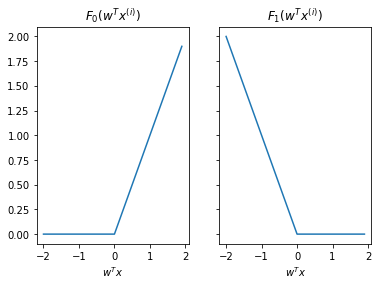

In [110]:
# Plotting ReLU function
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y1 = np.max([zero, z], axis=0)
y2 = np.max([zero, -z], axis=0)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(z, y1)
ax1.set_title('$F_{0}(w^Tx^{(i)})$')
ax1.set_xlabel('$w^Tx$')

ax2.plot(z, y2)
ax2.set_title('$F_{1}(w^Tx^{(i)})$')
ax2.set_xlabel('$w^Tx$')
plt.show()

Now, let's suppose that C is very large because SVMs usually performs better. The sum in the first term of the first equation has to be as close to zero as possible in order to minimize the equation. Thus, it is safe to say that the first term is zero if we choose a large C. Then, the second term is the only one remains. Before moving on to minimizing the second term, let's revisit vector inner product because it is the fundamental workhorse of SVMs.

### Vector Inner Product

Let's review the vector inner product. For example:

a = (a1,a2) <br />
b = (b1,b2) <br />
a · b = (a1)(b1) + (a2)(b2) <br />

This is also equivalently true:

a · b = |a||b| cos(θ)

Now let's assume p = |a| cos(θ). p is a length of projection a to b. In the figure below, the length of the black vector is p = |a| cos(θ), i.e. the projection of red vector to the blue vector.

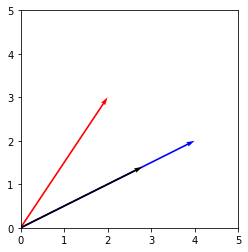

In [158]:
# A visualization for inner product

import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 2, 3], [0, 0, 4, 2],[0, 0, 2.7996, 1.3998]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['r', 'b','k'])
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.draw()
plt.show()

### SVM Decision Boundary

In the figure below, you and I intuitively know the black line is a better choice to separate the two datasets. But, how does the SVMs choose the black to be the best choice?

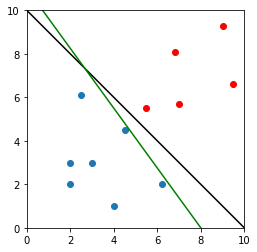

In [135]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
y1 = -x + 10
y2 = -(11/8)*x + 11

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,2,4,3,4.5,6.2,2.5],[2,3,1,3,4.5,2,6.1])
ax.scatter([7,9,9.5,6.8,5.5],[5.7,9.3,6.6,8.1,5.5], c = 'r')
ax.plot(x,y1, color = 'k')
ax.plot(x,y2, color = 'g')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.draw()
plt.show()

Let's take the above graph and explain it in term of SVM decision boundary. Imagine that, the vector a == w and b == x. w is a vector of weights, and x is a vector of features. For simplicity, let's consider 2 dimensions:

`w = (w1,w2)`<br />
`x = (x1,x2)`<br />

This means x has two features: x1 and x2. And, $w^Tx$ = |w||x|cos(θ) or $w^Tx$ = p·|w|. Back to equation (1) with large C, one can rewrite the two conditions:
<br />
- If y = 1 (positive ion), then $p·|w| >> 0$
<br />
- If y = 0 (negative ion), then $p·|w| << 0$

It can be proved that the decision boundary is perpendicular to the weight vector (w). In the graph below, the green vector is the weight vector. The purple vector is a projection vector of the X point.

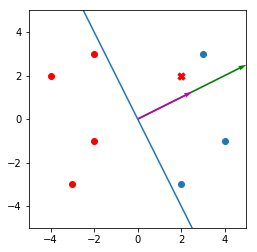

In [147]:
# SVM Decision Boundary in feature space.

import numpy as np
import matplotlib.pyplot as plt

# Decision boundary (blue line)
x = np.linspace(-10,10,1000)
y1 = -2*x

# the weight vector
soa = np.array([[0, 0, 5, 2.5], [0, 0, 2.5, 1.25]])
X, Y, U, V = zip(*soa)

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,4,3],[-3,-1,3])
ax.scatter([-4,-3,-2,-2],[2,-3,-1,3], c = 'r')
ax.scatter(2,2,c = 'r', marker = 'X', s = 50)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['g', 'm']) # weight vector and projection vector of X
ax.plot(x,y1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

However, this decision boundary will not be the optimal one because it doesn't satisfy the two equation. The optimal decision boundary will be the black line as describe below.

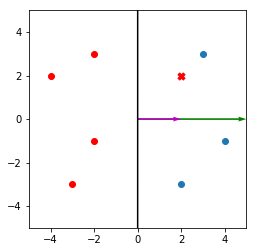

In [157]:
# SVM Decision Boundary in feature space.

import numpy as np
import matplotlib.pyplot as plt

# Decision boundary (blue line)
x = np.linspace(-10,10,1000)
y1 = 10000*x

# the weight vector
soa = np.array([[0, 0, 5, 0], [0, 0, 2, 0]])
X, Y, U, V = zip(*soa)

# Plotting
plt.figure()
ax = plt.gca()
ax.axis('scaled')
ax.scatter([2,4,3],[-3,-1,3])
ax.scatter([-4,-3,-2,-2],[2,-3,-1,3], c = 'r')
ax.scatter(2,2,c = 'r', marker = 'X', s = 50)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ['g', 'm']) # weight vector and projection vector of X
ax.plot(x,y1,color='k')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.show()

### Kernel

For non-linear decision boundary, one can extend the polynomial of the features to a higher order than 1. For instance, <br />
<br />
<center> $y = w_0 + w_1x_1+ w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + ... $ </center>
<br />
Now, let's suppose: 
<br />
<center> $y = w_0 + w_1f_1+ w_2f_2 + w_3f_3 + w_4f_4 + w_5f_5 + ... $ </center>
<br />
where $f_1 = x_1, f_2 = x_2, f_3 = x_1x_2, f_4 = x_1^2, f_5 = x_2^2, ...$. This is called kernelized. In this particular case, $f_i$ is a polynomial kernel. However, polynomial optimization can be very time consuming as the order increases. Is there any better kernel?

### Gaussian Kernel

Gaussian kernel is sometimes called similarity kernel. In scikit-learn, rbf is equivalent to gaussian kernel. Let's define the gaussian kernel:
<br />
<br />
<center> $f = similarity(x,l) = exp(-\frac{||x-l||^2}{2\gamma^2}) $ </center>
<br />
l is a landmark. A landmark is a point in feature space which defines as a similarity reference point relative to the data point. The numbers of feature are equal to the numbers of landmark.
<br />
<br />
If x ≈ l:
<br />
<br />
<center> $f = exp(-\frac{||x-l||^2}{2\gamma^2}) = 1$ </center>
<br />
If x is far from l:
<br />
<br />
<center> $f = exp(-\frac{||x-l||^2}{2\gamma^2}) = 0$ </center>
<br />

## 2. Code implementation with scikit-learn

Automatically created module for IPython interactive environment


C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


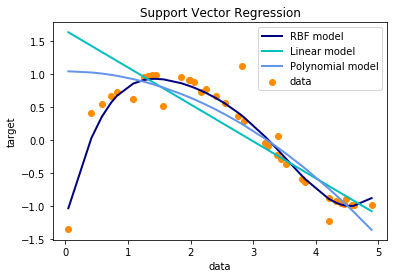

In [161]:
# This code is taken from http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py


print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()